In [ ]:
!pip install docx2txt

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3959 sha256=8a31212a00108e92cd10450739412e5780546ebb967c6fe184b368315b27e9a0
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [40]:
import torch
from diffusers import StableDiffusionPipeline, ControlNetModel
from torchvision.transforms import ToTensor
import numpy as np
import cv2
import os
from IPython.display import display

In [ ]:
!git clone https://github.com/CompVis/stable-diffusion
!git clone https://github.com/lllyasviel/ControlNet

Cloning into 'stable-diffusion'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 340 (delta 109), reused 92 (delta 92), pack-reused 182 (from 1)
Receiving objects: 100% (340/340), 42.58 MiB | 17.11 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Cloning into 'ControlNet'...
remote: Enumerating objects: 1356, done.
remote: Total 1356 (delta 0), reused 0 (delta 0), pack-reused 1356 (from 1)
Receiving objects: 100% (1356/1356), 122.40 MiB | 11.26 MiB/s, done.
Resolving deltas: 100% (596/596), done.


In [ ]:
!pip install diffusers
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 82.0 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline, ControlNetModel

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### Seed for reproducibility

In [ ]:
np.random.seed(12345)

### Loading the Stable Diffusion model from Hugging Face hub

In [ ]:
model = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Loading ControlNet model

In [ ]:
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-depth").to(device)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [ ]:
# Upload depth map (in Colab, you can upload files using the `files.upload()` method)
depth_map_1 = cv2.imread("1.png")
depth_map_2 = cv2.imread("2.png")
depth_map_3 = cv2.imread("3.png")
depth_map_4 = cv2.imread("4.png")
depth_map_5 = cv2.imread("5.png")

In [ ]:
# Convert depth maps to tensors
depth_map_1_tensor = ToTensor()(depth_map_1).unsqueeze(0).to(device)
depth_map_2_tensor = ToTensor()(depth_map_2).unsqueeze(0).to(device)
depth_map_3_tensor = ToTensor()(depth_map_3).unsqueeze(0).to(device)
depth_map_4_tensor = ToTensor()(depth_map_4).unsqueeze(0).to(device)
depth_map_5_tensor = ToTensor()(depth_map_5).unsqueeze(0).to(device)

In [ ]:
# Generate images using ControlNetModel (different aspect ratio: 768x480)
image_1 = model(prompt="beautiful landscape, mountains in the background", height=480, width=768, controlnet=controlnet, controlnet_conditioning=depth_map_1_tensor).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image_2 = model(prompt="luxury bedroom interior", height=480, width=768, controlnet=controlnet, controlnet_conditioning=depth_map_2_tensor).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image_3 = model(prompt="Beautiful snowy mountains", height=480, width=768, controlnet=controlnet, controlnet_conditioning=depth_map_3_tensor).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [37]:
image_4 = model(prompt="luxurious bedroom interior", height=480, width=768, controlnet=controlnet, controlnet_conditioning=depth_map_4_tensor).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [38]:
image_5 = model(prompt="walls with cupboard", height=480, width=768, controlnet=controlnet, controlnet_conditioning=depth_map_5_tensor).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

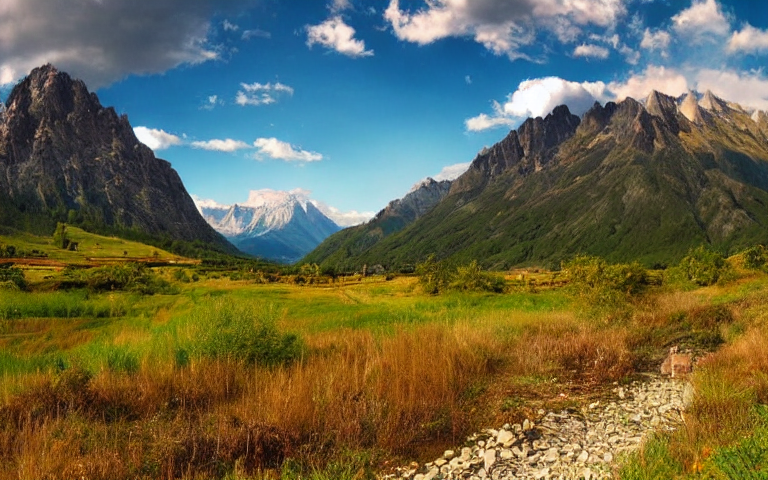

In [43]:
# Show or save the generated images
display(image_1)

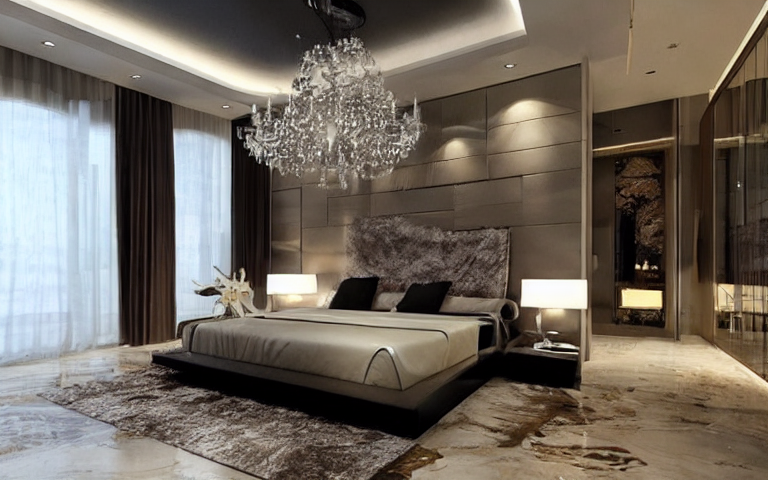

In [44]:
display(image_2)

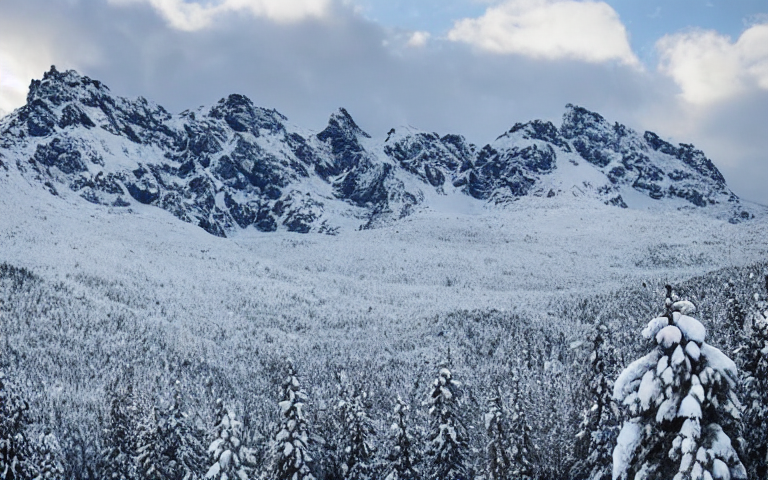

In [45]:
display(image_3)

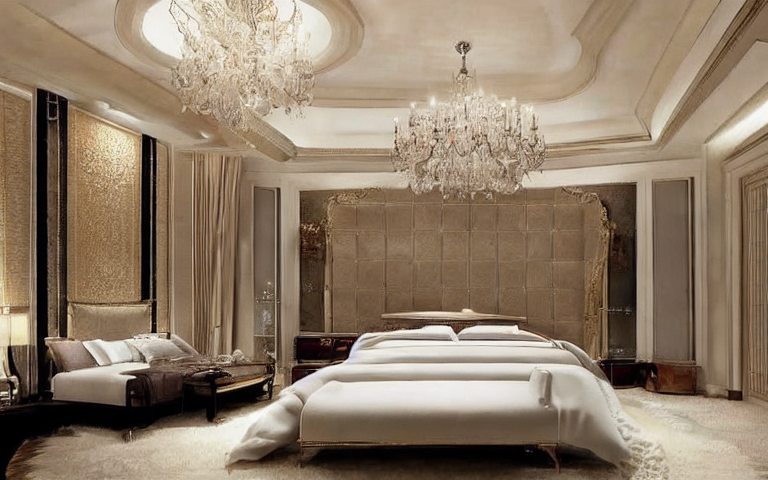

In [46]:
display(image_4)

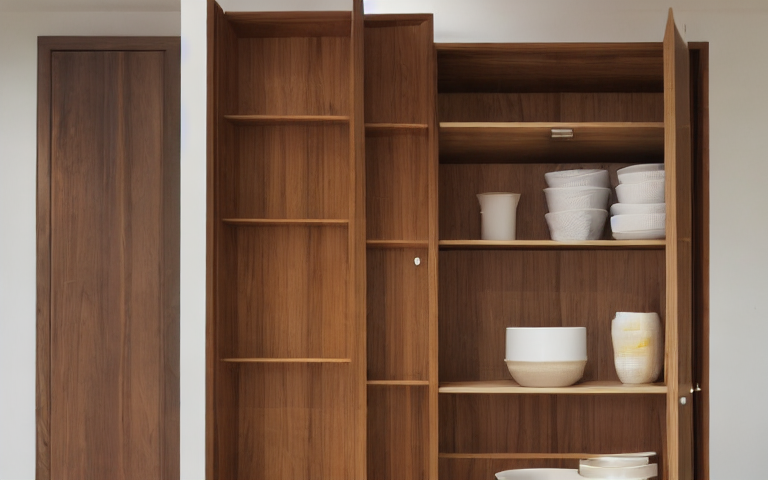

In [47]:
display(image_5)